# Titanic: Machine Learning from disaster project

The goal for this project:
* Apply multiple classification machine learning algorithm 
    * Logisitc Regression
    * KNN
    * Decision Tree
    * Random Foresting
    * SVM
* Predict survival or deceased

For this project, I'll be applying the Logistic Regression algorithm on the famous [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) dataset!

This is a typical project for all new Data scientist which is why this will be my first project! 

## Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
train_titanic = pd.read_csv("titanic_train.csv")

There are 418 observation in our test dataset. There are several non-null values missing from the 'Age' and 'Cabin' column. 

In [6]:
# Lets take a look at our training dataset as-well and see if similar things are happening to it as it did for the test dataset
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The train dataset are also missing some non-null values in the 'Age' and 'Cabin' column. Two values are also missing from the 'Embarked' column. 

For the purpose of organization, I am going to lay out my steps that I plan to do. 
* EDA (Exploratory data analysis) Understand and visualize the data to gain insights
    * Histogram
    * Boxplot
    * Value counts
    * Missing data
    * Explore interesting themes
* Prepare the data for Machine Learning algorithms
    * Data cleaning
    * Data Exploration
    * Data preprocessing 
* Select models and train it 
    * Train/validate split
    * Model selection/train
    * Model predictions and results
    * Model evaluation
* Fine-tune my model
* Final results

# EDA
Even though I know I am missing some non-null values, I would still like to visualize it.

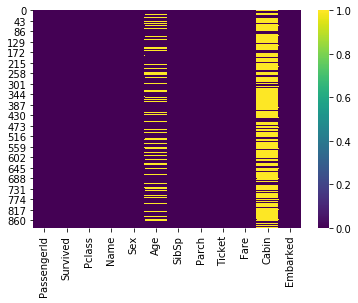

In [9]:
sns.heatmap(train_titanic.isnull(), cmap='viridis')

In [10]:
sum(train_titanic['Age'].isnull())/891

0.19865319865319866

There is roughly 20% non-null value missing which is small enough to replace them with some form of imputation. While looking at the 'Cabin' column, there are way too many missing values so I'll probably either not use it or perform feature engineering on it, depends on if I think that feature is valuable or not. 

What am I going to replace the value with? The mean or median of the age? To get an idea on which i'll use, I should look at the data distribution for the 'Age' column.

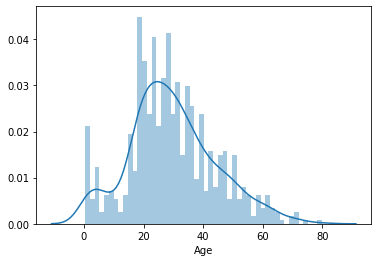

In [11]:
sns.distplot(train_titanic['Age'], bins=50)

There seems to be a lot of outliers and the distribution is kind of skewed so using the mean for a replacement won't be a good idea since the mean is greatly affected by the outliers. I will be using median as a replacement.

Lets also take a look at all the distribution of the numerical data! Using the information above, the columns with the numerical data are 'PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', and 'Fare'. 'Passenger Id' seems to be only to identify, 'Survived' and 'Pclass' are categorical columns, these three will not be plotted. 

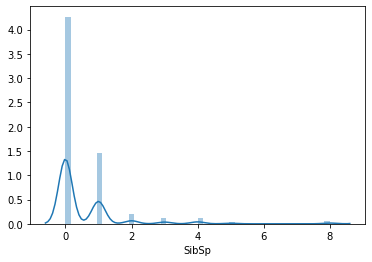

In [12]:
sns.distplot(train_titanic['SibSp'], bins = 50)

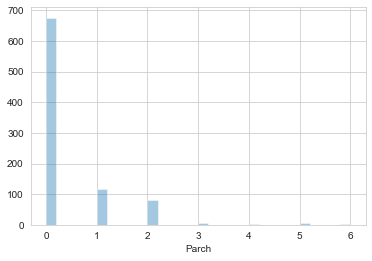

In [376]:
sns.distplot(train_titanic['Parch'], bins = 30, kde=False)

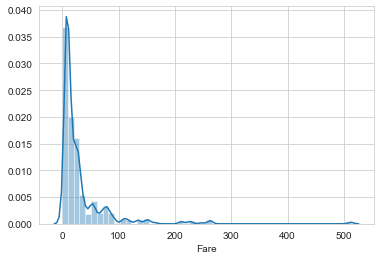

In [325]:
sns.distplot(train_titanic['Fare'], bins = 50)

Looks like we should try to normalize these numerical columns.

We should now see if there are any correlation with our target class 'Survived' and other features.
* Survive Vs. Sex
* Survive Vs. Pclass
* Survive Vs. Fare (Based on your fare, it will determine your Pclass. We don't be visualizing this. Column might not be that useful for me)

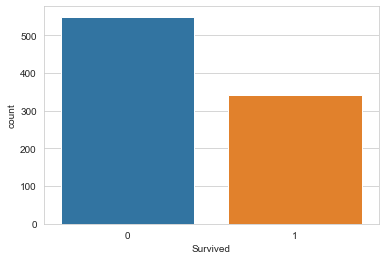

In [326]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train_titanic)

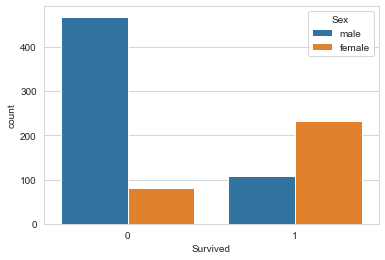

In [327]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train_titanic)

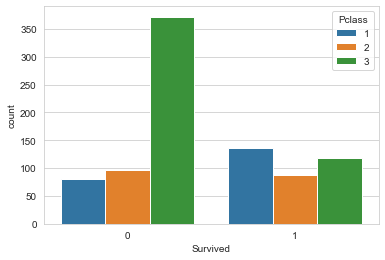

In [328]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train_titanic)

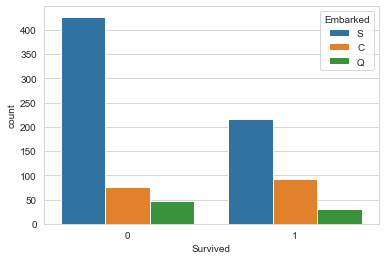

In [329]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Embarked', data=train_titanic)

Looks like if the subject is male and/or of lower class, they have a lower survive rate. The port at which the subjects embarked doesn't seem to matter and seems proportionate.

Now lets see if we can gather any other type of uneful information with the other columns such as;
* Embark 
* SibSb

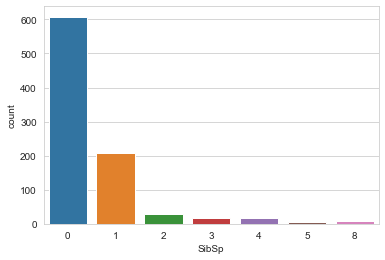

In [330]:
sns.countplot(x='SibSp', data=train_titanic)

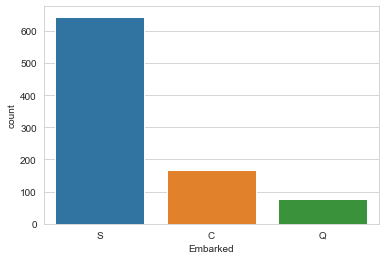

In [331]:
sns.countplot(x='Embarked', data=train_titanic)

Most of the population either came from the S port and/or has 0 siblings.

I won't get into cabin and fare price because I don't think I can get any insights on it and it's very noisy. 

# Prepare the data for Machine Learning algorithms

## Data cleaning

Since we know that there are some missing non-null values in the 'Age' and 'Cabin' column, we should focus on those two first. 

In [14]:
train_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As mentioned above, I will be using the median age to replace my missing values. Since I know that if you're a female and/or of higher class, you have a higher chance of survival so I will be replacing the missing values with the median age for certain Pclass. I will also drop the few missing values in 'Embarked'.

In [15]:
gb = train_titanic.groupby('Pclass')
gb.median()['Age']

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

Now that I have the median based on the class, I will write a function that will replace all missing value with the median age which depends on the class.

In [16]:
def replace(column):
    age = column[0]
    pclass = column[1]
    
    if pd.isnull(age):
        if pclass == 1: 
            return 37
        elif pclass == 3:
            return 29
        else:
            return 24
        
    else:
        return age

In [17]:
train_titanic['Age'] = train_titanic[['Age','Pclass']].apply(replace, axis=1)

Because cabin has too many missing values and requires further investigation (ex. looking into the layout of the titanic boat to help understand the cabin), I will be dropping that column.

When I build my models, I won't be needing the 'Name' and 'Ticket' columns. I am going to assume these two columns are irrlevant for the model. Ticket might have an impact on the model but I've decided to drop that column altogether. 

In [18]:
train_titanic.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

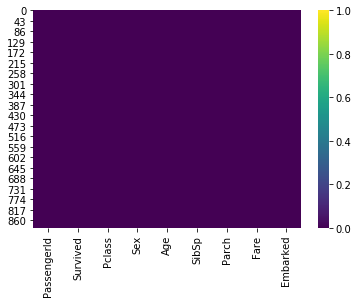

In [19]:
sns.heatmap(train_titanic.isnull(), cmap='viridis')

Looks like there are still a few missing values, i'll be dropping them. 

In [20]:
train_titanic.dropna(inplace=True)

## Data preprocessing

For the machine learning algorithm to take in all those categorical features as inputs, I need to convert these categorical features into dummies. When converting these categorical features into indicator variables, I need to drop the first column of the dummies because they're perfect predictors of one another so the ML algorithm will pick that up and I don't want that.

In [21]:
sex = pd.get_dummies(train_titanic['Sex'], drop_first=True)
embark = pd.get_dummies(train_titanic['Embarked'], drop_first=True)
train_titanic.drop(['Sex','Embarked'],axis=1, inplace=True)
train_titanic = pd.concat([train_titanic, sex, embark],axis=1)

In [22]:
train_titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


I will try training my models using the scaled and non-scaled training dataset. 

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_titanic.drop('Survived', axis=1), train_titanic['Survived'], test_size = 0.25)

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

# Model building (baseline)
The purpose of this project is to build models to predict whether the subject will survive or not using a bunch of different ML algroithms I've learned. I will build a model using baseline parameters and guage how each of the models perform by using 5 fold cross-validation. I will then perform some model tuning to see if I can further improve my models. The models used will be:
* Logistic Regression (79.4%)
* KNN (79.9%)
* Decision Tree (76.4%)
* Random Forest (81.5%)
* SVM (81.4%)


In [26]:
# I am importing all of the models I plan to use
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [27]:
# Logistic Regression
logr = LogisticRegression(max_iter=1000)
# Using X scaled
crs = cross_val_score(logr, X_train_scaled, y_train, cv=5)
# Using X non-scaled
cr = cross_val_score(logr, X_train, y_train, cv=5)
print('Scaled:', crs.mean())
print('Not Scaled:', cr.mean())

Scaled: 0.7928066434743576
Not Scaled: 0.7943104028728538


In [28]:
# KNN
knn = KNeighborsClassifier()
crs = cross_val_score(knn, X_train_scaled, y_train, cv=5)
cr = cross_val_score(knn, X_train, y_train, cv=5)
print('Scaled:', crs.mean())
print('Not Scaled:', cr.mean())

Scaled: 0.7988553473235326
Not Scaled: 0.6335203680843902


In [29]:
# Decision Tree
tre = DecisionTreeClassifier()
crs = cross_val_score(tre, X_train_scaled, y_train, cv=5)
cr = cross_val_score(tre, X_train, y_train, cv=5)
print('Scaled:', crs.mean())
print('Not Scaled:', cr.mean()) 

Scaled: 0.7597127146223769
Not Scaled: 0.7642688811581191


In [30]:
# Random Forest
rf = RandomForestClassifier()
crs = cross_val_score(rf, X_train_scaled, y_train, cv=5)
cr = cross_val_score(rf, X_train, y_train, cv=5)
print('Scaled:', crs.mean())
print('Not Scaled:', cr.mean())

Scaled: 0.810840534171249
Not Scaled: 0.8153518123667377


In [31]:
# SVM
sv = SVC()
crs = cross_val_score(sv, X_train_scaled, y_train, cv=5)
cr = cross_val_score(sv, X_train, y_train, cv=5)
print('Scaled:', crs.mean())
print('Not Scaled:', cr.mean())

Scaled: 0.8138592750533048
Not Scaled: 0.6441364605543709


The model is performing worse with the scaled data. As far as I know, only KNN, requires the input variables to be scaled.

# Model tuning

With my current knowledge of differnet ML algorithms, I won't be able to fine tune the Logisitic Regression and Random Forest models. As for Decision tree, there is Random Forest. 
* KNN (81%)
* SVM (80%)

## KNN tuning
With my current knowledge of KNN, I only know how to tune KNN by modifying the N-Neighbours(k). I will now try to find the best k value to use.

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

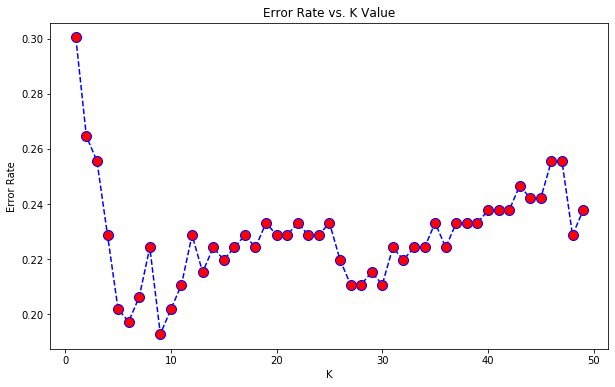

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Looks like k=9 will give the least amount of error.

In [39]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=1')
print('Confusion Matrix:')
print(confusion_matrix(y_test,pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,pred))

WITH K=1
Confusion Matrix:
[[126  13]
 [ 30  54]]


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       139
           1       0.81      0.64      0.72        84

    accuracy                           0.81       223
   macro avg       0.81      0.77      0.78       223
weighted avg       0.81      0.81      0.80       223



## SVM tuning

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [10, 5, 2, 1,0.1,0.01,0.001], 'kernel': ['rbf']}

In [41]:
grid_svm = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

In [42]:
grid_svm.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=5, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=5, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=5, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    2.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [10, 5, 2, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [43]:
grid_svm.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
grid_svm.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

Since I place refit to be true, the model with the best parameters is automatically applied.

In [46]:
sv_pred = grid_svm.predict(X_test_scaled)
print('Confusion Matrix:')
print(confusion_matrix(y_test,sv_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test,sv_pred))

Confusion Matrix:
[[126  13]
 [ 32  52]]


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       139
           1       0.80      0.62      0.70        84

    accuracy                           0.80       223
   macro avg       0.80      0.76      0.77       223
weighted avg       0.80      0.80      0.79       223



After fine tuning my model, I've managed to increase the accuracy of both KNN and SVC to 67.4% from 60.4% and 63.5% respectively.

## Model Predictions, final test

In [57]:
logr.fit(X_train_scaled, y_train)
logr_pred = logr.predict(X_test_scaled)
print('Logisitc Regression: \n', classification_report(y_test,logr_pred))

tre.fit(X_train_scaled, y_train)
tre_pred = tre.predict(X_test_scaled)
print('Decision Tree: \n', classification_report(y_test,tre_pred))

rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled )
print('Random Forest: \n', classification_report(y_test,rf_pred))

Logisitc Regression: 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       139
           1       0.76      0.61      0.68        84

    accuracy                           0.78       223
   macro avg       0.77      0.75      0.75       223
weighted avg       0.78      0.78      0.77       223

Decision Tree: 
               precision    recall  f1-score   support

           0       0.79      0.73      0.76       139
           1       0.61      0.68      0.64        84

    accuracy                           0.71       223
   macro avg       0.70      0.71      0.70       223
weighted avg       0.72      0.71      0.72       223

Random Forest: 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       139
           1       0.80      0.67      0.73        84

    accuracy                           0.81       223
   macro avg       0.81      0.78      0.79       223
weighted avg     

# Conclusion

In this project, I've built miltiple models to predict whether the subject survives or not. Since this is a Classification problem, the models used was; Logistic Regression, KNN, Decision Tree, Random Foresting, and SVM. Here are the final performances for each model:
* Logistic Regression (78%)
* KNN (81%)
* Decision Tree (71%)
* Random Forest (81.5%)
* SVM (80%)

As you can see, the best performing model was Random Foresting using the basic parameters. In general, models can be further improved by:
* Getting more data 
* Tuning the parameters 
* Using the other features given in the dataset that weren't used in this (Cabin, Ticket, Title from the Name)


# Final Thoughts

This is my first project where I've tried to apply a lot of the things I've learned on Data Science. From Importing data, analyzing, visualizing, building different models, tuning the models, and evaluated my models. There are many things I could learn such as but not limited to:
* Learning Other models 
    * Naive Bayes
    * Extreme Gradiant boosting 
* Apply ensemble approach (use a combination of different models)